In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("data/training_preprocessed.csv")
y= df.FraudResult
df.drop("FraudResult", axis=1, inplace=True)
X= df
X.drop(["TransactionId"], axis=1, inplace=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [4]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [5]:
test_comb = X_test
test_comb["y_true"] = y_test
test_comb["y_pred"] = y_pred
test_comb

,Year,Month,Week,Day,is_workday,is_worktime,SignAmount,ModAmount,ProviderId_1,ProviderId_2,...,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day,day_vs_week,day_vs_month,week_vs_month,y_true,y_pred
51838,2019,1,1,6,0,0,1,1000.0,0,0,...,1,399,359,54,20,0.370370,0.055710,0.150418,0,0
27114,2018,12,50,14,1,1,1,2500.0,0,0,...,1,778,388,133,20,0.150376,0.051546,0.342784,0,0
55266,2019,1,2,9,1,1,1,1040.0,0,0,...,1,24,10,10,4,0.400000,0.400000,1.000000,0,0
59708,2019,1,2,13,0,0,1,20000.0,0,0,...,1,57,27,7,2,0.285714,0.074074,0.259259,0,0
36773,2018,12,51,22,0,1,1,2000.0,0,0,...,1,120,71,13,1,0.076923,0.014085,0.183099,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68549,2019,1,4,22,1,0,1,1000.0,0,0,...,2,7,5,4,4,1.000000,0.800000,0.800000,0,0
71039,2019,1,4,25,1,1,1,10000.0,1,0,...,1,20,11,5,4,0.800000,0.363636,0.454545,0,0
34586,2018,12,51,21,1,0,1,3800.0,0,0,...,1,100,36,7,5,0.714286,0.138889,0.194444,0,0
62967,2019,1,3,18,1,0,1,1000.0,0,0,...,1,74,27,25,7,0.280000,0.259259,0.925926,0,0


In [6]:
false_positive = test_comb[test_comb.y_true < test_comb.y_pred]
false_negative = test_comb[test_comb.y_true > test_comb.y_pred]
correct = test_comb[test_comb.y_true == test_comb.y_pred]
true_positive = correct[correct.y_pred == 1]
true_negative = correct[correct.y_pred == 0]

In [7]:
print(false_positive.shape[0])
print(false_negative.shape[0])
print(true_positive.shape[0])
print(true_negative.shape[0])

14
25
23
23854


In [8]:
recall= true_positive.shape[0] / (true_positive.shape[0]+false_negative.shape[0])
print(recall)

0.4791666666666667


<AxesSubplot:xlabel='ModAmount', ylabel='Count'>

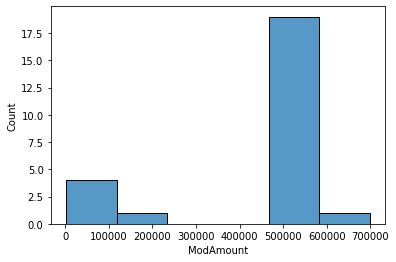

In [9]:
import seaborn as sns
sns.histplot(data= false_negative, x="ModAmount")

<AxesSubplot:xlabel='ModAmount', ylabel='Count'>

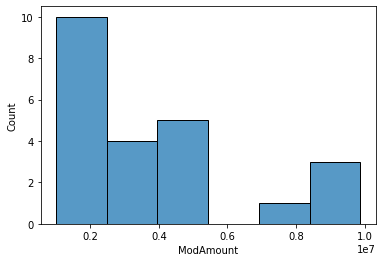

In [10]:
sns.histplot(data= true_positive, x="ModAmount")

In [11]:
false_negative[false_negative.SignAmount == 1].ModAmount.sum()

10848000.0

In [12]:
false_negative[false_negative.SignAmount == 0].ModAmount.sum()

1005.0

In [13]:
true_positive[true_positive.SignAmount == 1].ModAmount.sum()

90529988.0

In [14]:
true_positive[true_positive.SignAmount == 0].ModAmount.sum()

0.0

In [16]:
from Error_analysis import calculate_cost
    

In [17]:
df_pred, saved_money = calculate_cost(X_test, y_test, y_pred)

You saved the company 90.53 UGX
The company still has to reimburse frauds with a total of 10.85 UGX
Total money saved is 79.68 Million UGX
